<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Clustering-_Assignment/blob/main/Clustering_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

# **Problem statement --> Perform different clustering for given crime data set and optimizing the number of clusters**

In [ ]:
data = pd.read_csv('/content/crime_data.csv')

In [ ]:
data.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [ ]:
data.rename(columns={'Unnamed: 0':"State"},inplace=True)

In [ ]:
data.head(4)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df = data.copy()

In [ ]:
x=df.iloc[:,1:-1]
x.head()

,Murder,Assault,UrbanPop
0,13.2,236,58
1,10.0,263,48
2,8.1,294,80
3,8.8,190,50
4,9.0,276,91


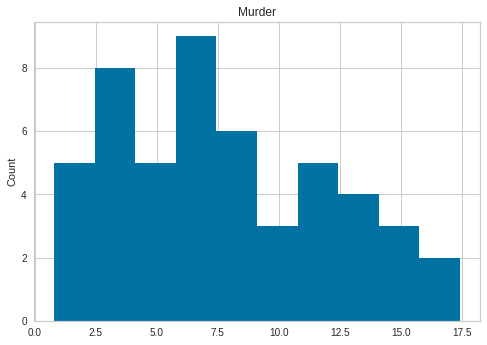

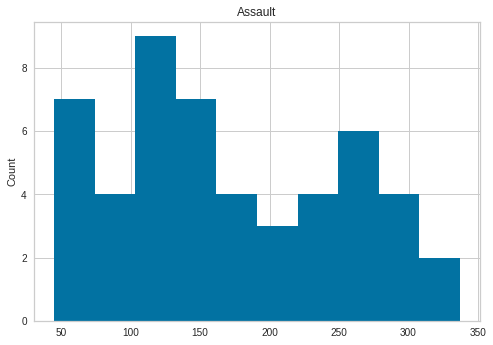

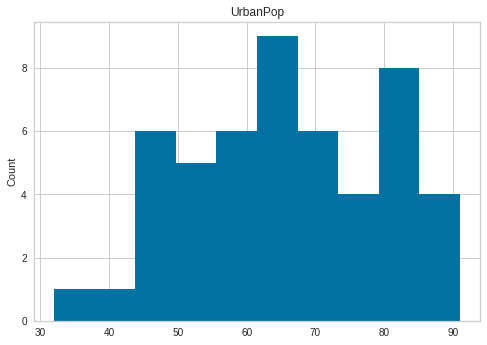

In [ ]:
for feature in x:
    df[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


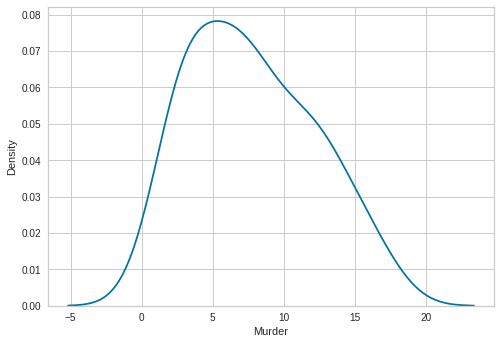

Assault


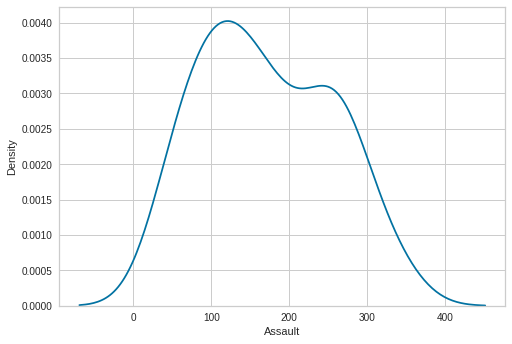

UrbanPop


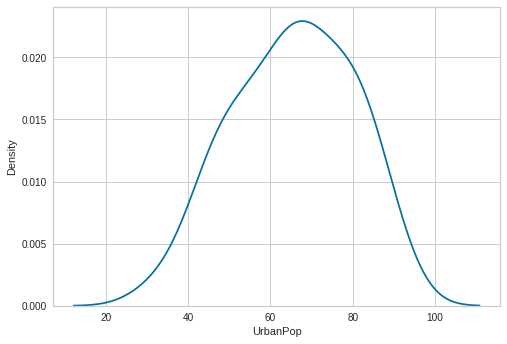

In [ ]:
for n in x:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

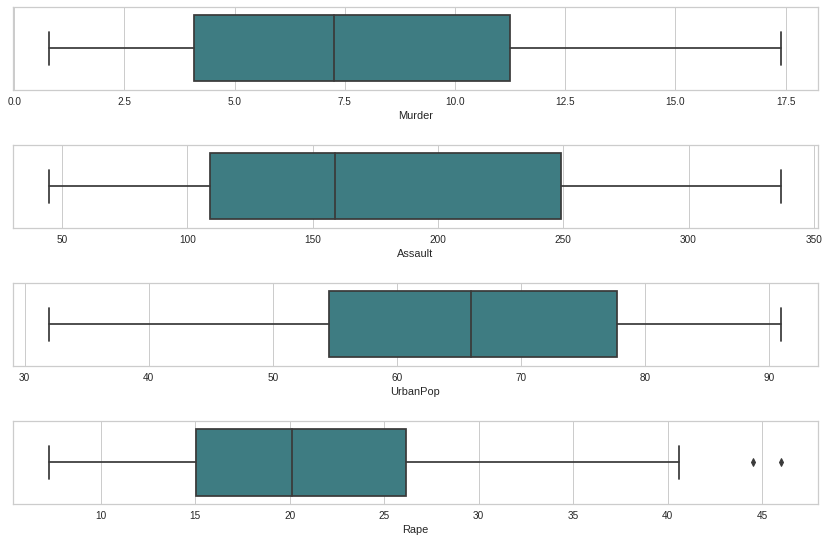

In [ ]:
fig, axes=plt.subplots(4,1,figsize=(12,8))
sns.boxplot(x='Murder',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

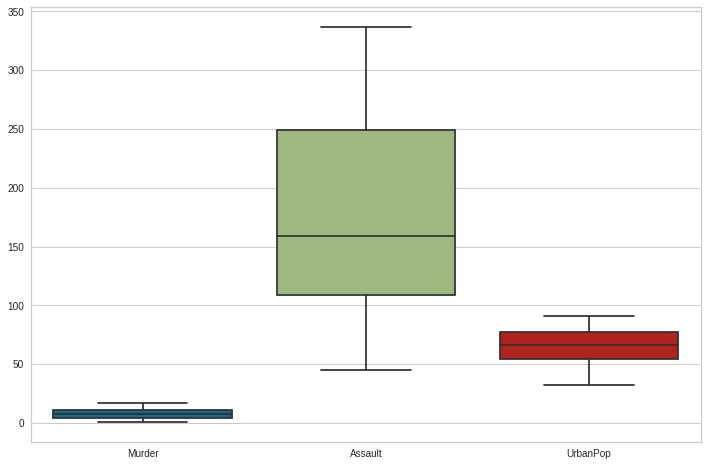

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=x)

<Axes: >

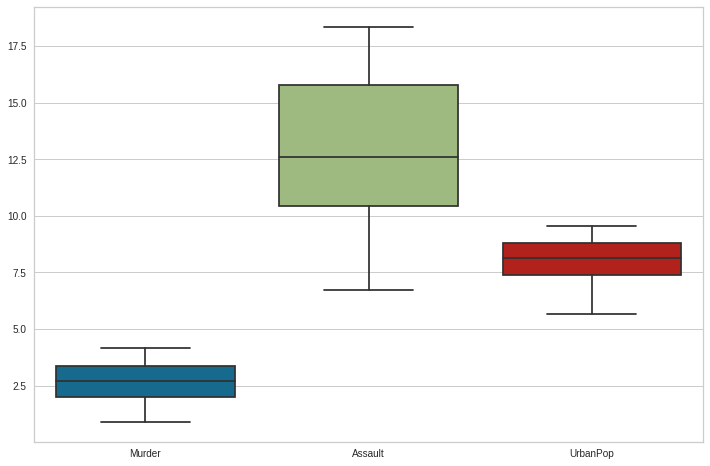

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(x))

In [ ]:
corr = df.corr()

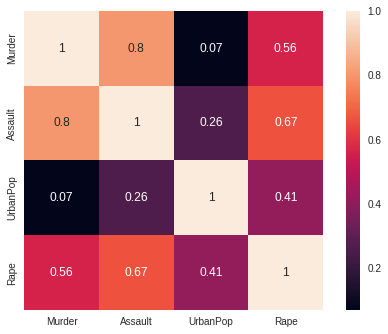

In [ ]:
sns.heatmap(corr,square=True,annot=True)
plt.show()

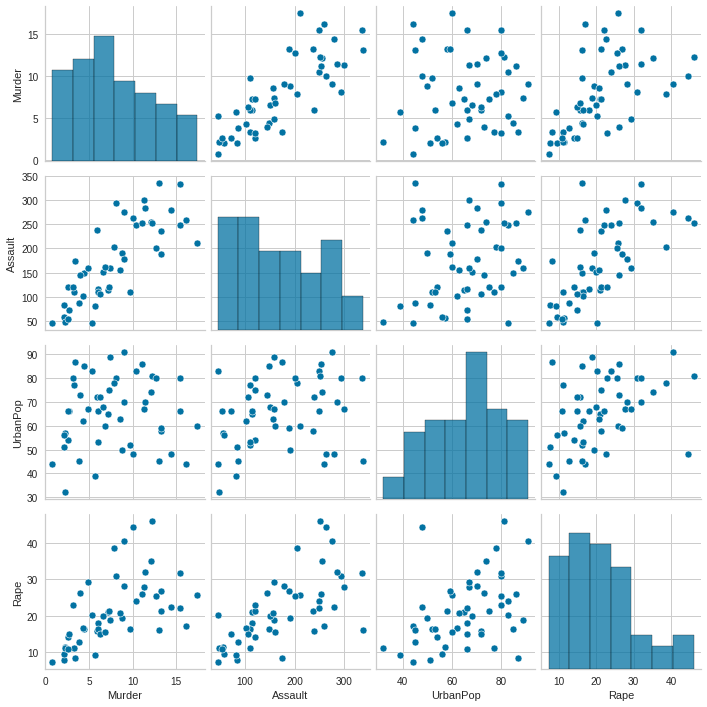

In [ ]:
sns.pairplot(df)

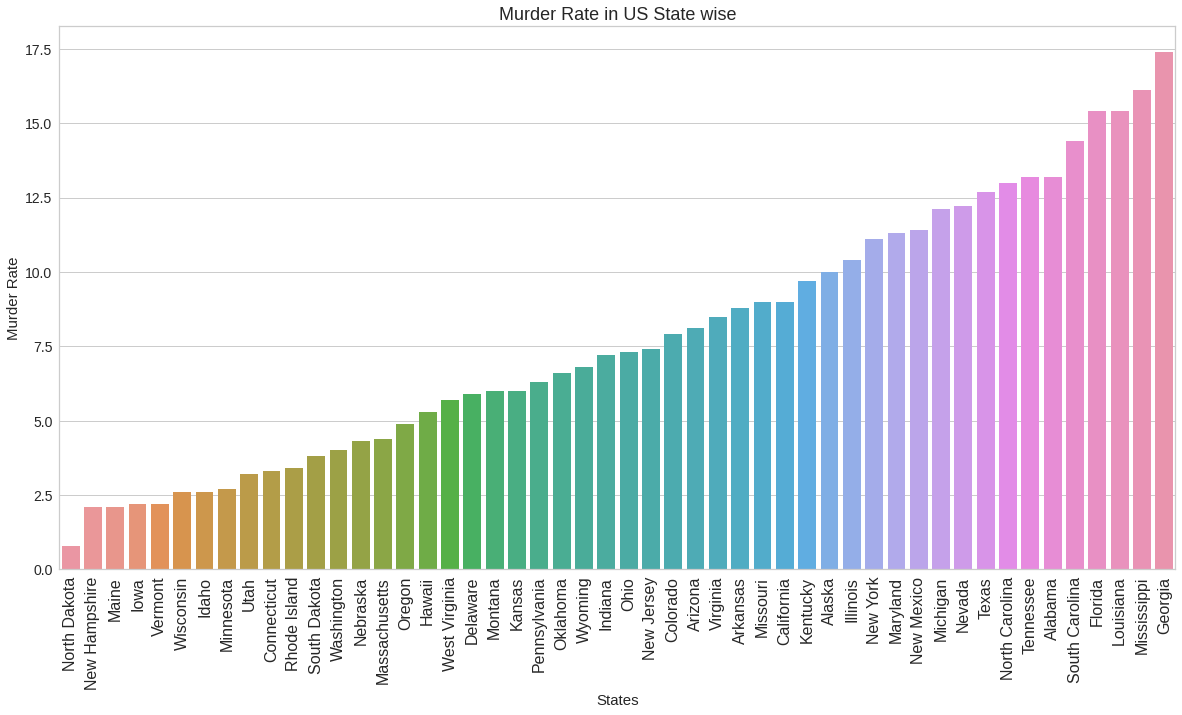

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="State",
            y="Murder",
            data=data,
            order=data.sort_values("Murder").State)
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

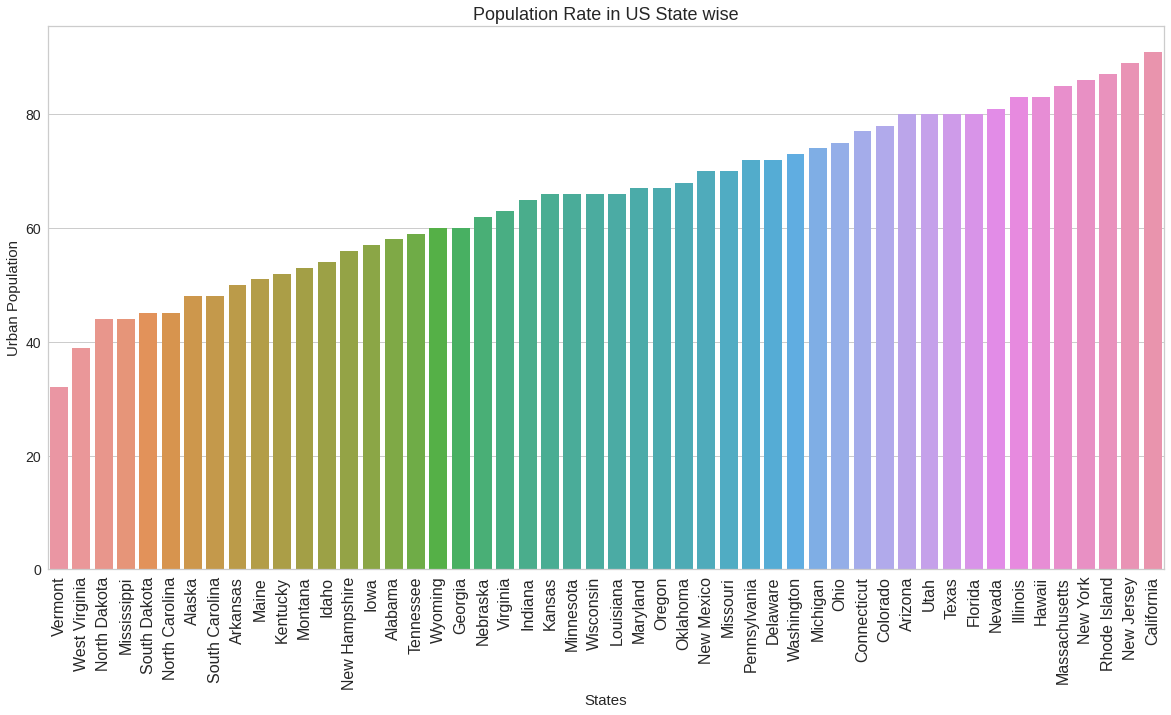

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='State',
            y="UrbanPop",
            data=data,
            order=data.sort_values('UrbanPop').State)
plt.xlabel("States", size=15)
plt.ylabel("Urban Population", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Population Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,State,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [ ]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,State,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [ ]:
murder_L = data.sort_values('Murder', ascending = True,ignore_index=True)
murder_L.head()

,State,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


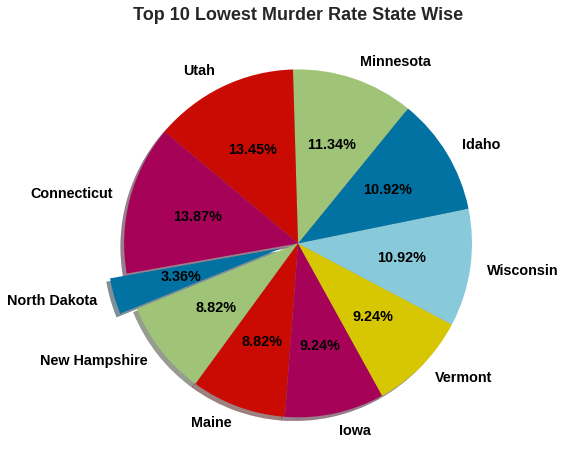

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(murder_L.Murder[:10],
       labels=murder_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,State,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


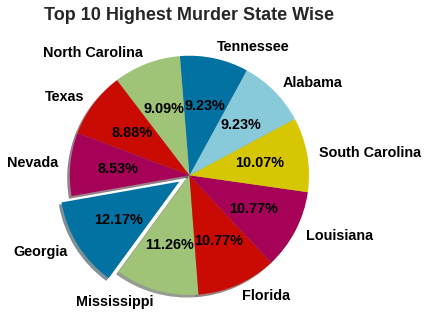

In [ ]:
plt.pie(murder.Murder[:10],
       labels=murder.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.title("Top 10 Highest Murder State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

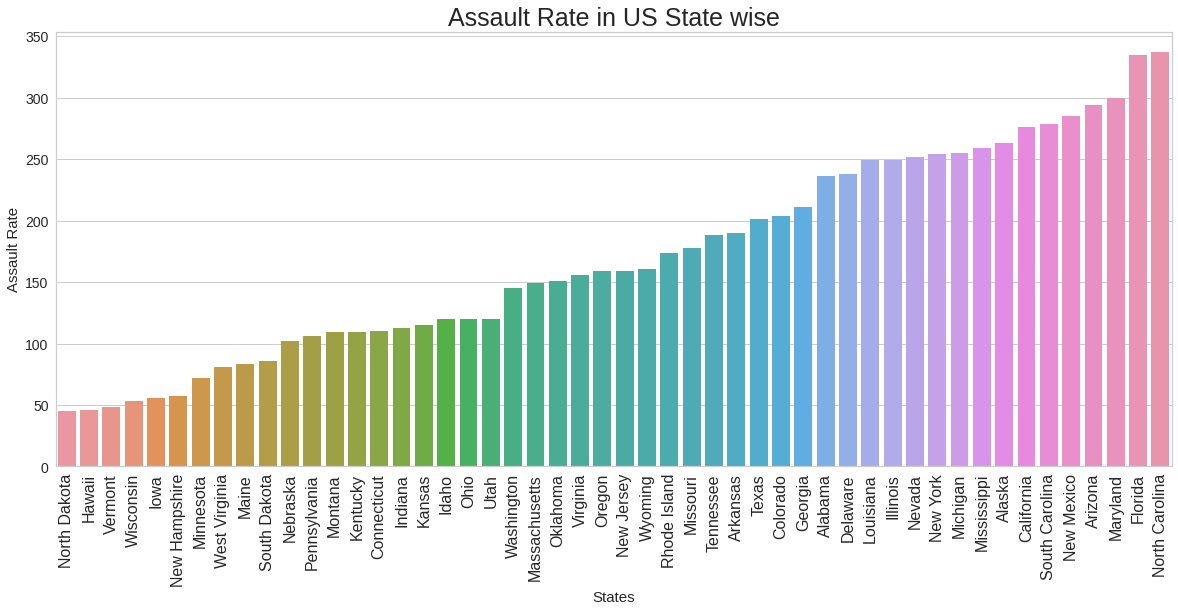

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='State',
            y="Assault",
            data=data,
            order=data.sort_values('Assault').State)
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=25)
plt.show()

In [ ]:
print('Top 10 States with Highest Assault Rate')
Assault_H=data.sort_values('Assault',ascending=False, ignore_index=True)
Assault_H.head(10)

Top 10 States with Highest Assault Rate


,State,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [ ]:
print('Top 10 States with Lowest Assault Rate')
Assault_L=data.sort_values('Assault',ascending=True, ignore_index=True)
Assault_L.head(10)

Top 10 States with Lowest Assault Rate


,State,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


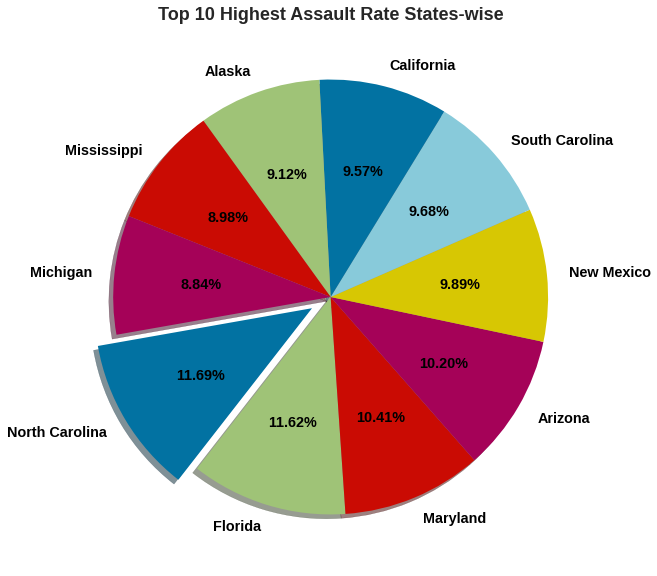

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(Assault_H.Assault[:10],
       labels=Assault_H.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

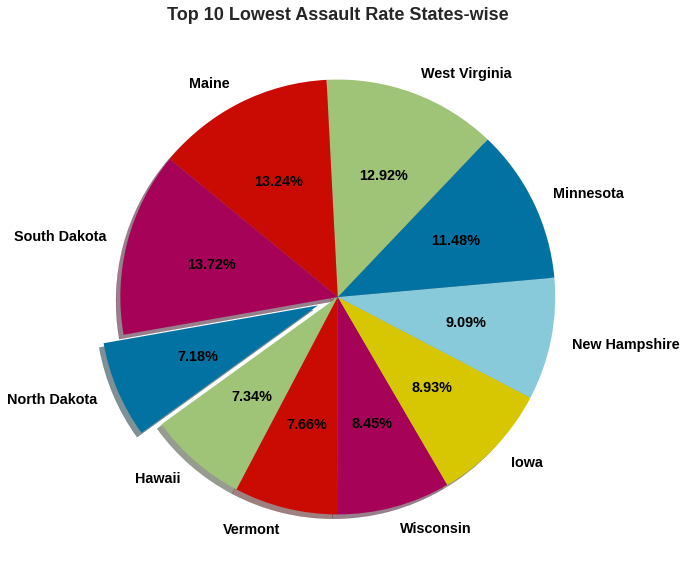

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(Assault_L.Assault[:10],
       labels=Assault_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

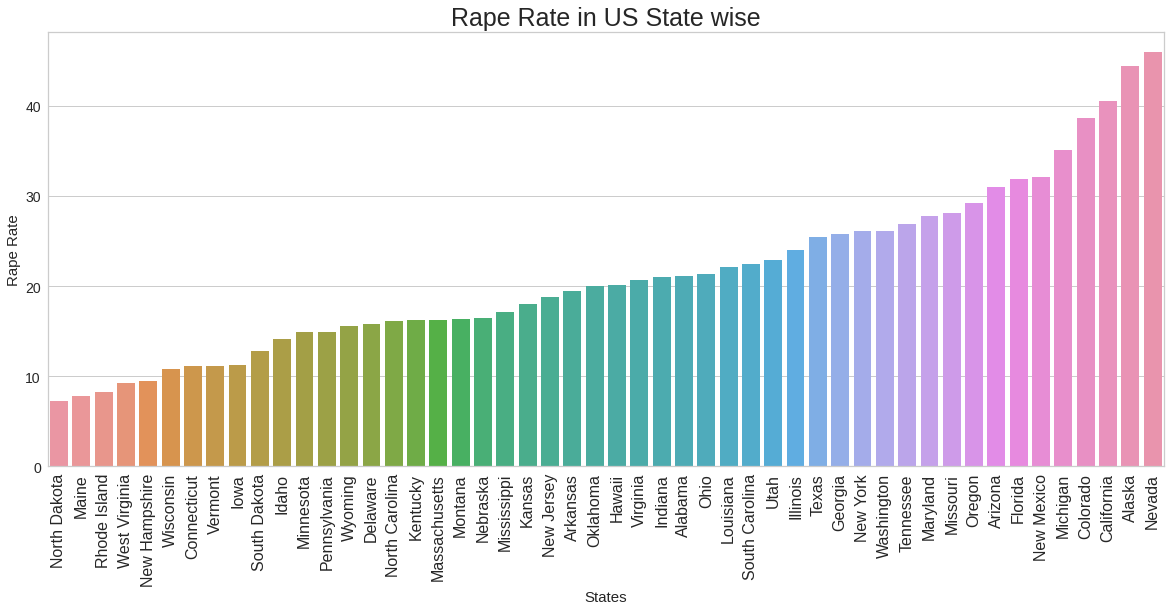

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='State',
            y="Rape",
            data=data,
            order=data.sort_values('Rape').State)
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=25)
plt.show()

In [ ]:
print('Top 10 States with Highest Rape Rate')
Rape_H=data.sort_values('Rape',ascending=False, ignore_index=True)
Rape_H.head(10)

Top 10 States with Highest Rape Rate


,State,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [ ]:
print('Top 10 States with Lowest Rape Rate')
Rape_L=data.sort_values('Rape',ascending=True, ignore_index=True)
Rape_L.head(10)

Top 10 States with Lowest Rape Rate


,State,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


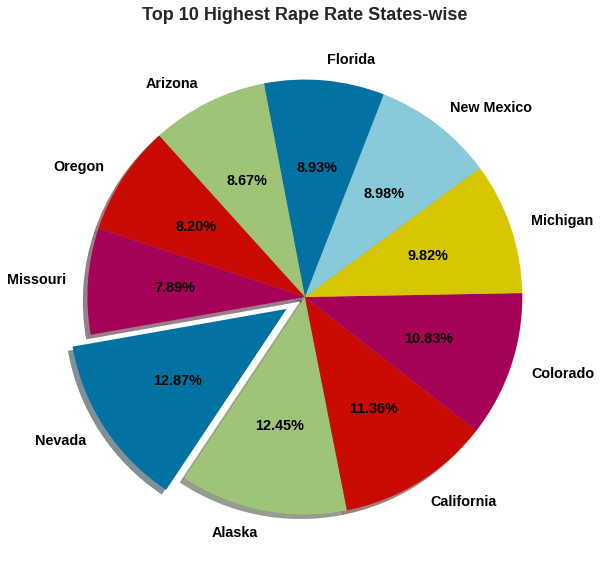

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(Rape_H.Rape[:10],
       labels=Rape_H.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'color':'black'})
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

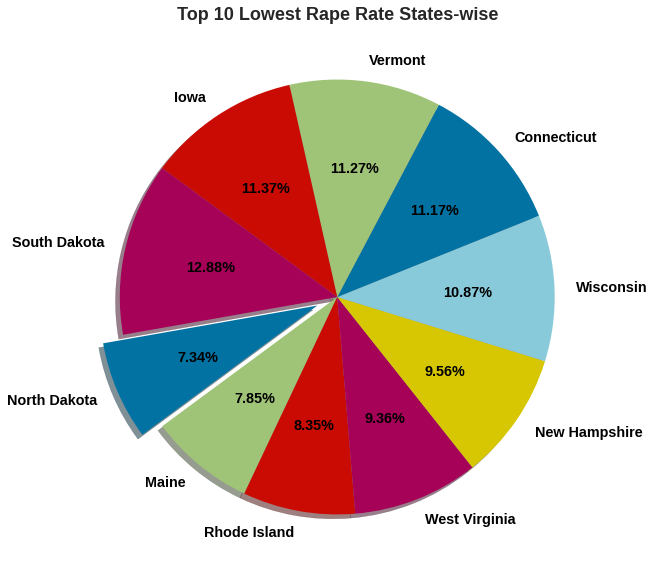

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(Rape_L.Rape[:10],
       labels=Rape_L.State[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

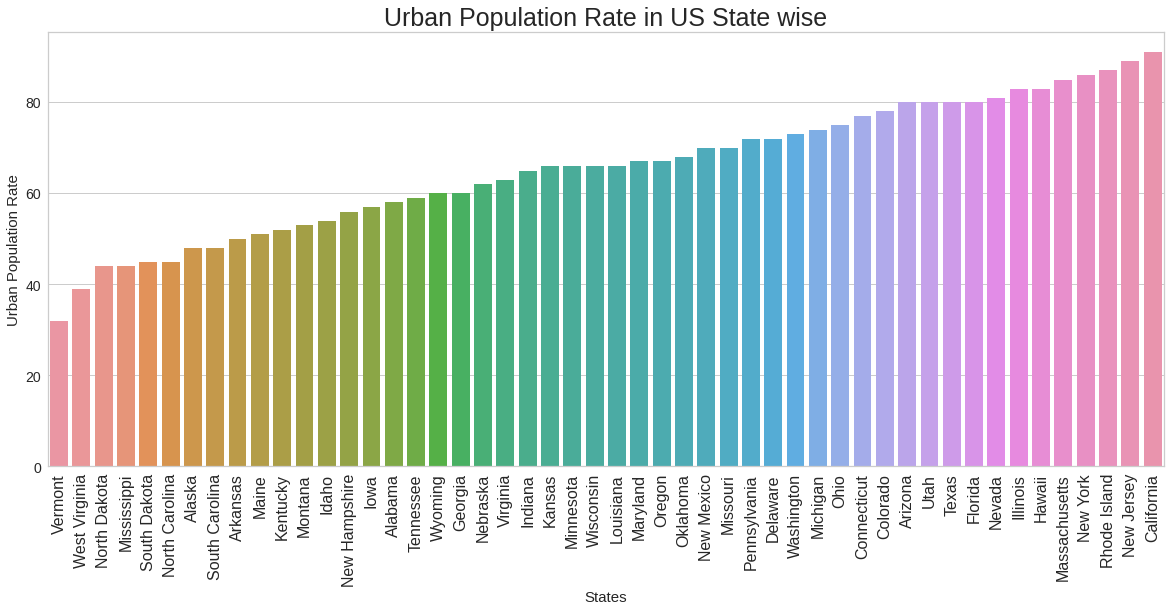

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='State',
            y="UrbanPop",
            data=data,
            order=data.sort_values('UrbanPop').State)
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=25)
plt.show()

# **KMeans Clustering**

In [ ]:
df = data.set_index('State')
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
st_sc=StandardScaler()
std_df=st_sc.fit_transform(df)

print(std_df.shape)

(50, 4)


In [ ]:
minmax=MinMaxScaler()
minmax_df=minmax.fit_transform(df)
minmax_df.shape

(50, 4)

In [ ]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

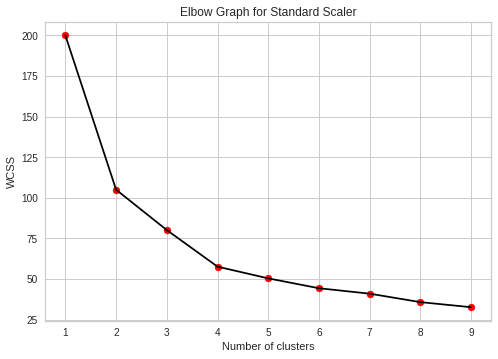

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for Standard Scaler data


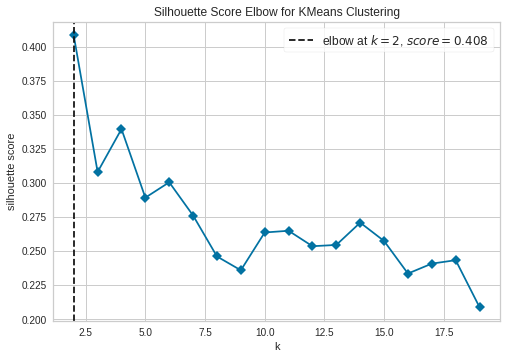

In [ ]:
model = KMeans(random_state=42, max_iter=300, init='k-means++')

visualise = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for Standard Scaler data')
visualise.fit(std_df)
visualise.poof()
plt.show()

In [ ]:
clust_list = [2,3,4,5,6,7,8,9,10]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.30813622648945616
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.2892698909578641
For n_clusters = 6 The average silhouette_score is : 0.3005771754063692
For n_clusters = 7 The average silhouette_score is : 0.2761342454285954
For n_clusters = 8 The average silhouette_score is : 0.24606152983626525
For n_clusters = 9 The average silhouette_score is : 0.2359060232768202
For n_clusters = 10 The average silhouette_score is : 0.2636703762849359


In [ ]:
from sklearn.metrics import silhouette_score

# **Building KMeans Clustering using k=2**

In [ ]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
print("Shape: ",y_predict_kmeans.shape)
print("Labels: ",model_kmeans.labels_)

Shape:  (50,)
Labels:  [1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [ ]:
model_kmeans.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [ ]:
model_kmeans.inertia_

104.96163315756871

In [ ]:
df['Kmeans_label'] = model_kmeans.labels_
df.head(3)

,Murder,Assault,UrbanPop,Rape,Kmeans_label
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1


In [ ]:
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [ ]:
print(df[df['Kmeans_label']==0].count())
df[df['Kmeans_label']==0]

Murder          30
Assault         30
UrbanPop        30
Rape            30
Kmeans_label    30
dtype: int64


,Murder,Assault,UrbanPop,Rape,Kmeans_label
State,,,,,
Arkansas,8.8,190,50,19.5,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Hawaii,5.3,46,83,20.2,0
Idaho,2.6,120,54,14.2,0
Indiana,7.2,113,65,21.0,0
Iowa,2.2,56,57,11.3,0
Kansas,6.0,115,66,18.0,0
Kentucky,9.7,109,52,16.3,0


In [ ]:
print(df[df['Kmeans_label']==1].count())
df[df['Kmeans_label']==1]

Murder          20
Assault         20
UrbanPop        20
Rape            20
Kmeans_label    20
dtype: int64


,Murder,Assault,UrbanPop,Rape,Kmeans_label
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [ ]:
print(df[df['Kmeans_label']==2].count())
df[df['Kmeans_label']==2]

Murder          0
Assault         0
UrbanPop        0
Rape            0
Kmeans_label    0
dtype: int64


,Murder,Assault,UrbanPop,Rape,Kmeans_label
State,,,,,


SilhouetteVisualizer(ax=<Axes: >,
                     colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a'],
                     estimator=KMeans(n_clusters=2, random_state=0))

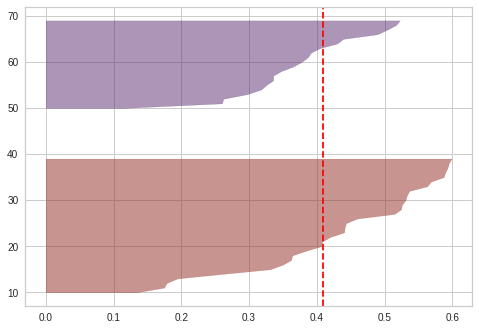

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)

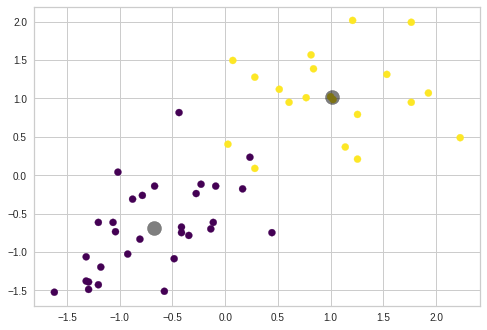

In [ ]:
plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

# **Bulding KMeans Clustering on MinMaxScaler Data**

In [ ]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df.head(3)

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878


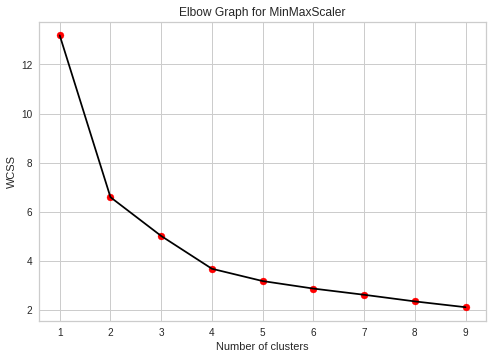

In [ ]:
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


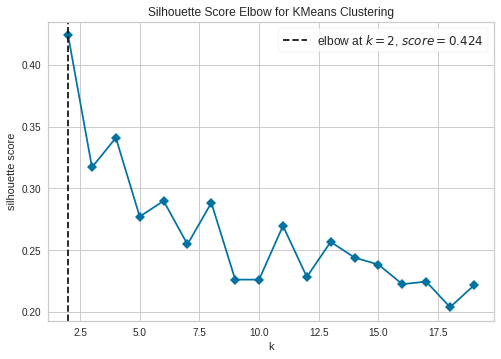

In [ ]:
model = KMeans(random_state=42, max_iter=300, init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)
visualizer.poof()
plt.show()

In [ ]:
clust_list = [2,3,4,5,6,7,8]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31705482042661864
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.27717216976092157
For n_clusters = 6 The average silhouette_score is : 0.2899261135608551
For n_clusters = 7 The average silhouette_score is : 0.2547326884584678
For n_clusters = 8 The average silhouette_score is : 0.2883826443108348


For n_clusters = 2 on MinMaxScaled data transformation on Crime data set will give better clusters than other values

# **Hierarchical Clustering Algorithm**

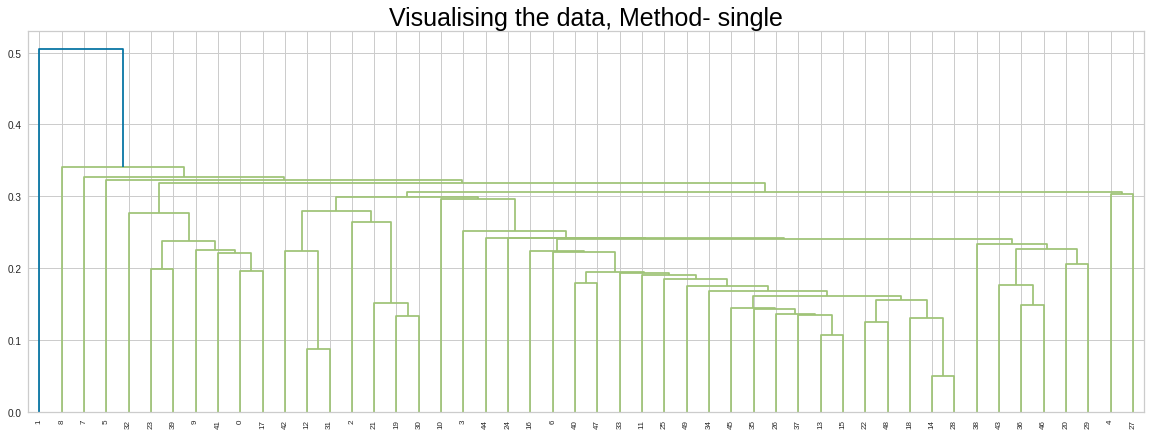

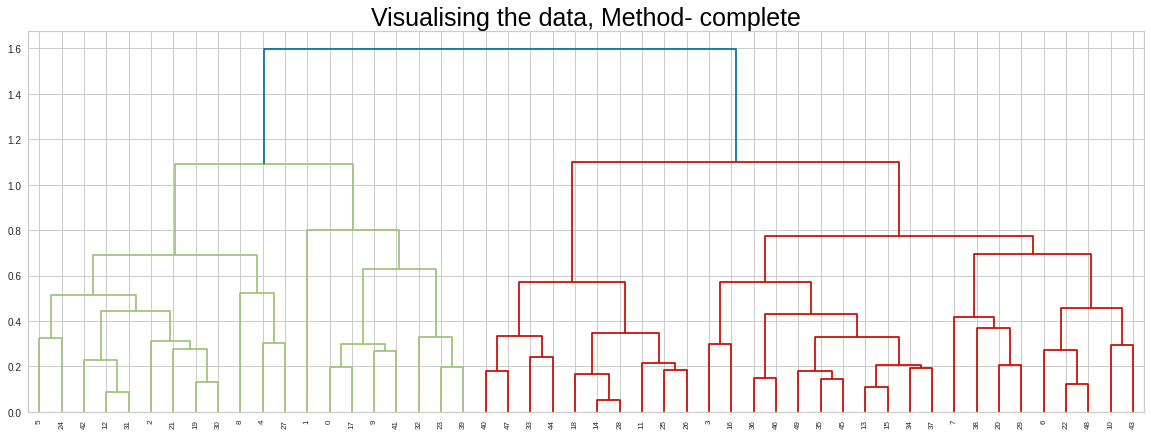

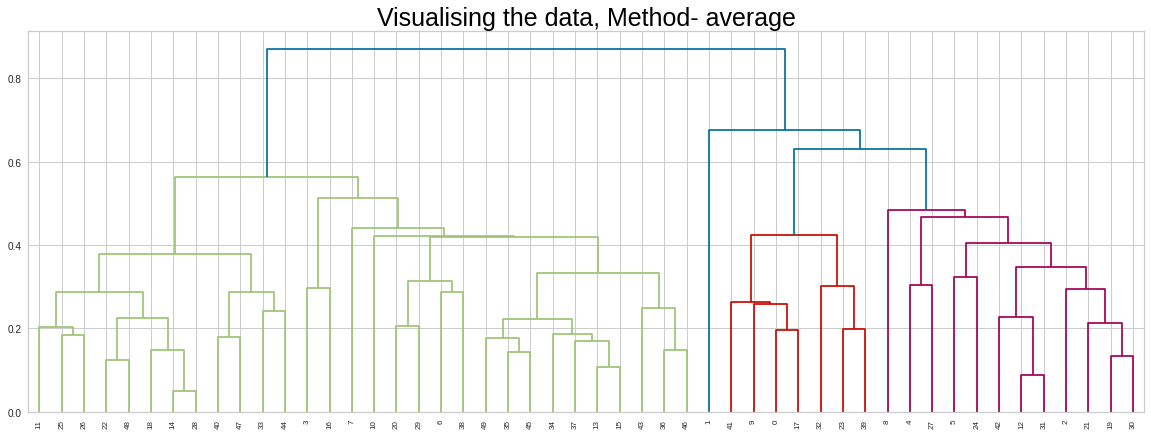

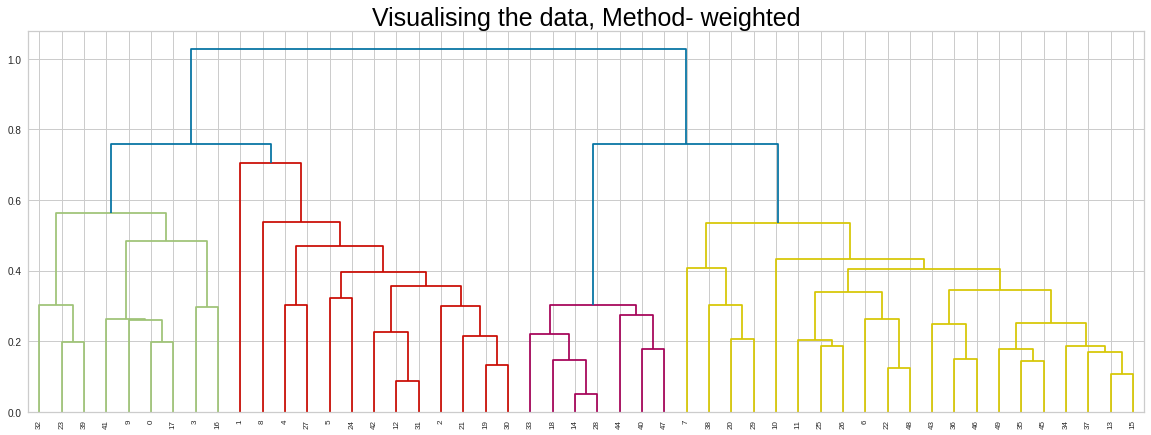

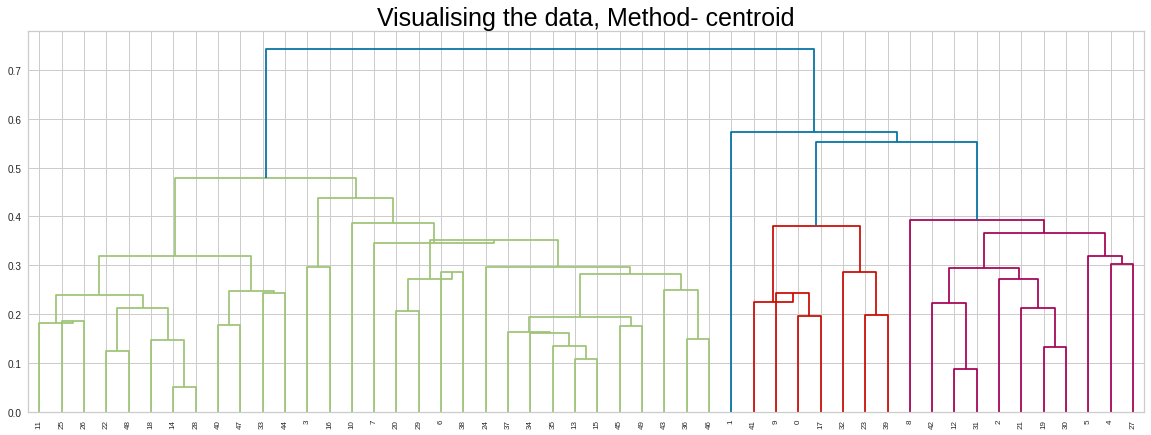

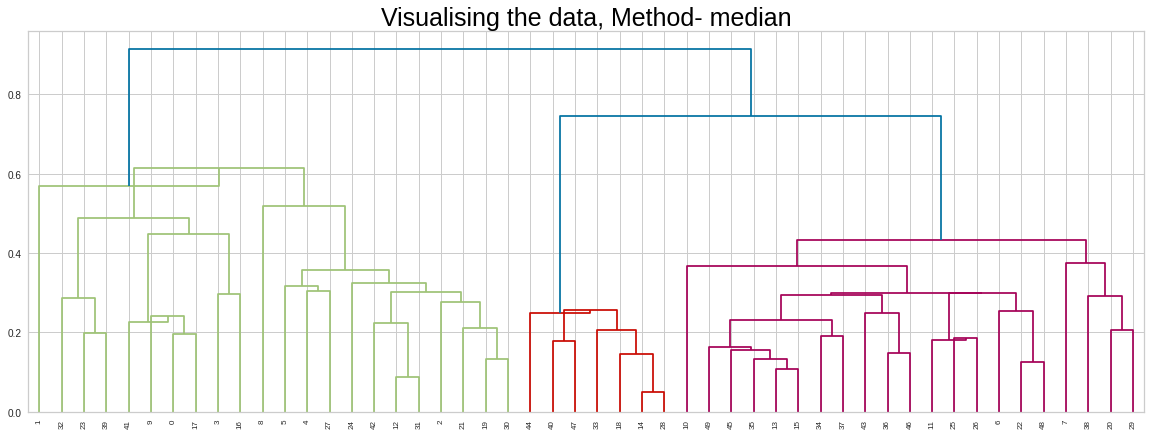

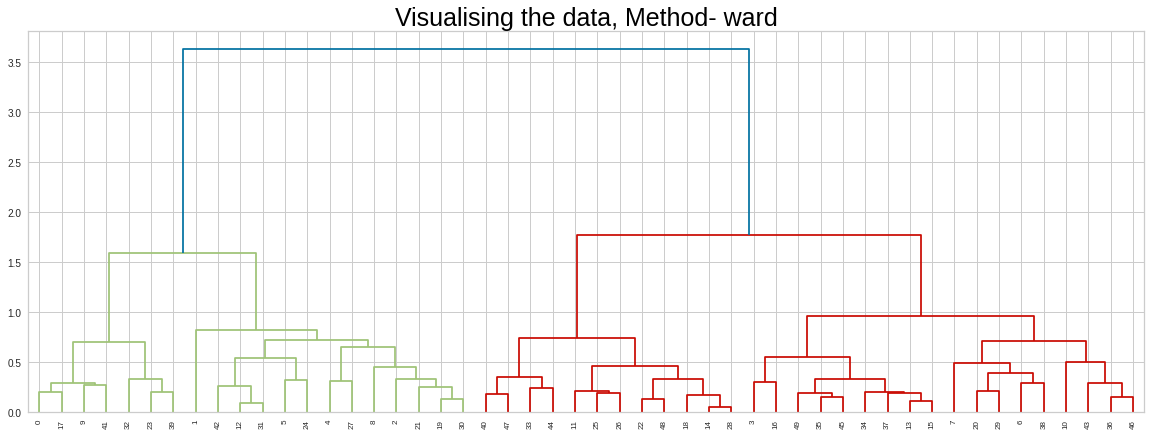

In [ ]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20,7))

    dict = {'fontsize':25,'fontweight' :15, 'color' : 'black'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred_h= agg_clustering.fit_predict(minmax_df)
print(y_pred_h.shape)
y_pred_h

(50,)


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
agg_clustering.n_clusters_

2

In [ ]:
(sil(minmax_df,agg_clustering.labels_)*100).round(3)

42.364

In [ ]:
df['Hierarchical_labels'] = agg_clustering.labels_
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,12.165,255.250000,68.400000,29.165000,1.0
1,4.870,114.433333,63.633333,15.943333,0.0


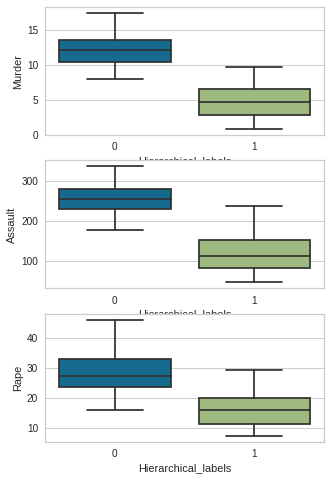

In [ ]:
fig, axes=plt.subplots(3,1,figsize=(5,8))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df,ax=axes[0])
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df,ax=axes[1])
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df,ax=axes[2])
plt.show()

From the above graph , cluster 0 : indicates safe state

cluster 1 : indicates danger state

# **DBSCAN**

In [ ]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

In [ ]:
DBSCAN_params

[(0.25, 1), (0.25, 2), (0.5, 1), (0.5, 2)]

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


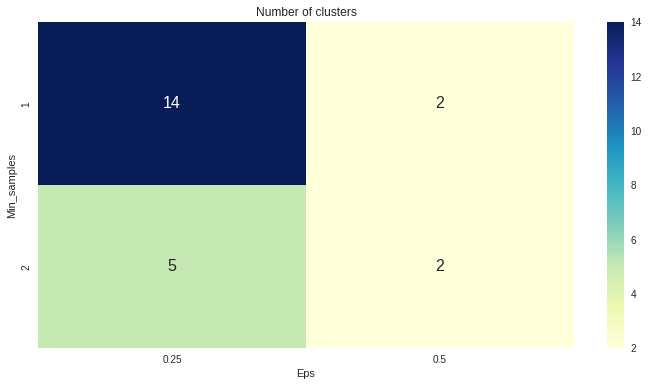

Eps,0.25,0.50
Min_samples,,
1,14,2
2,5,2


In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()
pivot_1

In [ ]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
print(dbscan.fit(minmax_df))

DBSCAN(min_samples=1)


In [ ]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
State,,,,,,,
Alabama,13.2,236,58,21.2,1,0,0
Alaska,10.0,263,48,44.5,1,0,1
Arizona,8.1,294,80,31.0,1,0,0
Arkansas,8.8,190,50,19.5,0,1,0
California,9.0,276,91,40.6,1,0,0


In [ ]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,0.387755,1.0
Hierarchical_labels,0.612245,0.0
DBSCAN_labels,0.000000,1.0


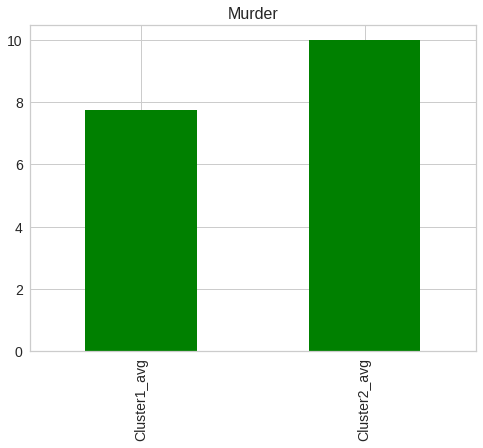

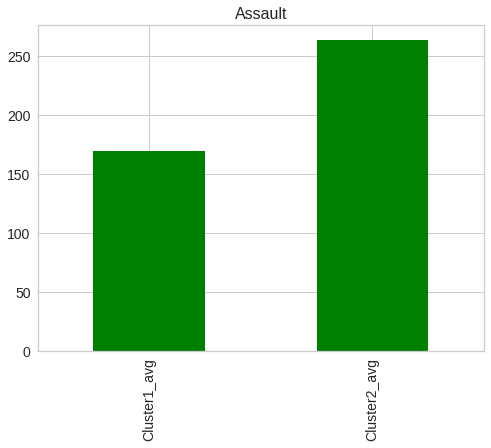

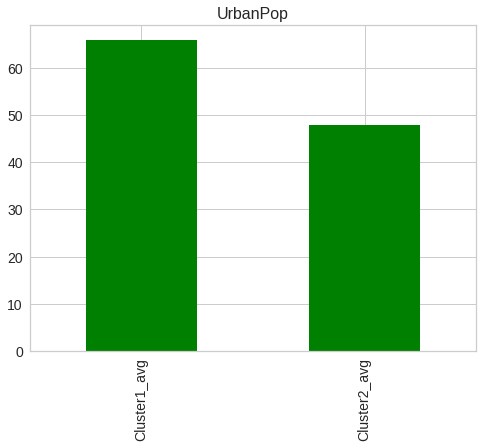

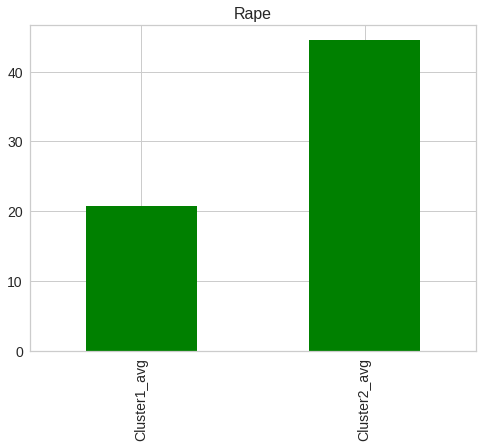

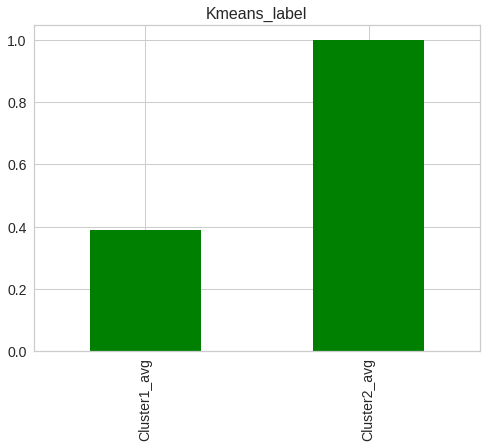

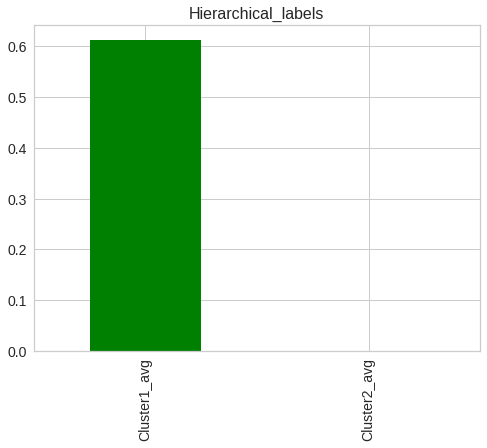

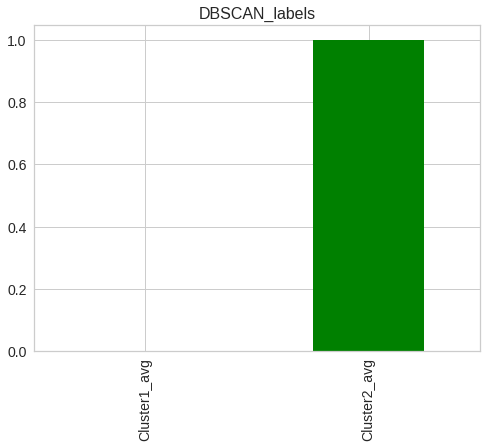

In [ ]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14,color='green')
    plt.show()
    print()

# **Conclusion**- Using Hierarchical Clustering with k=2 and using ward linkage, higher silhouette score is obtained. That means the algorithm can correctly identify the labels.